In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle

import math
from shapely import Polygon, Point, MultiPoint, MultiPolygon, GeometryCollection
from shapely.ops import voronoi_diagram
from shapely.strtree import STRtree
import pathlib
from numpy.random import randint
import numpy as np
from scipy import signal
from sklearn.preprocessing import MinMaxScaler

In [2]:
pedpy_blue = (89 / 255, 178 / 255, 216 / 255)
pedpy_orange = (220 / 255, 160 / 255, 73 / 255)
pedpy_green = (108 / 255, 190 / 255, 167 / 255)
pedpy_petrol = (98 / 255, 190 / 255, 190 / 255)
pedpy_grey = (114 / 255, 125 / 255, 139 / 255)
pedpy_red = (233 / 255, 117 / 255, 134 / 255)

In [3]:
import warnings

warnings.filterwarnings("ignore")

In [4]:
def plot_ped(ax, origin, angle, alpha):
    foot1_vector = (origin[0] + 0.1, origin[1] - 0.15)
    rotate_foot1_vector = (
        math.cos(angle * foot1_vector[0]) - math.sin(angle * foot1_vector[1]),
        math.sin(angle * foot1_vector[0]) + math.cos(angle * foot1_vector[1]),
    )
    foot_1 = Ellipse(
        rotate_foot1_vector, 0.2, 0.1, color="black", fill=False, angle=angle
    )
    foot_2 = Ellipse(
        (origin[0] - 0.1, origin[1] + 0.15),
        0.2,
        0.1,
        color="black",
        fill=False,
        angle=angle,
    )

    body = Ellipse(origin, 0.3, 0.5, color="gray", angle=angle, alpha=alpha)
    head = Ellipse(origin, 0.275, 0.2, color="black", angle=angle, alpha=alpha)

    # print(rotate_foot1_vector)
    # ax.add_patch(foot_1)
    # ax.add_patch(foot_2)
    ax.add_patch(body)
    ax.add_patch(head)
    ax.scatter(*origin, color="white")

# Geometries

## Walkable area

In [5]:
from pedpy import WalkableArea

walkable_area = WalkableArea([(-9, 0), (-9, 5), (9, 5), (9, 0)])

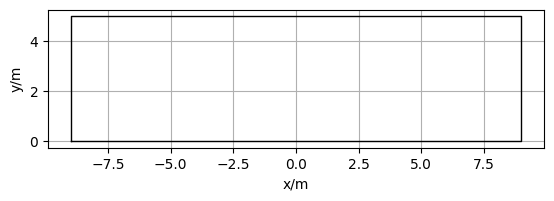

In [7]:
from pedpy import plot_walkable_area

plot_walkable_area(
    walkable_area=walkable_area, hole_color="lightgrey"
).set_aspect("equal")

plt.show()

## With bounding box

In [20]:
type(cells)
cells[0]

array([<POLYGON ((-9.5 8, -9.5 7.5, -10 7.5, -10 8, -9.5 8))>,
       <POLYGON ((-9 8, -9 7.5, -9.5 7.5, -9.5 8, -9 8))>,
       <POLYGON ((-8.5 8, -8.5 7.5, -9 7.5, -9 8, -8.5 8))>,
       <POLYGON ((-8 8, -8 7.5, -8.5 7.5, -8.5 8, -8 8))>,
       <POLYGON ((-7.5 8, -7.5 7.5, -8 7.5, -8 8, -7.5 8))>,
       <POLYGON ((-7 8, -7 7.5, -7.5 7.5, -7.5 8, -7 8))>,
       <POLYGON ((-6.5 8, -6.5 7.5, -7 7.5, -7 8, -6.5 8))>,
       <POLYGON ((-6 8, -6 7.5, -6.5 7.5, -6.5 8, -6 8))>,
       <POLYGON ((-5.5 8, -5.5 7.5, -6 7.5, -6 8, -5.5 8))>,
       <POLYGON ((-5 8, -5 7.5, -5.5 7.5, -5.5 8, -5 8))>,
       <POLYGON ((-4.5 8, -4.5 7.5, -5 7.5, -5 8, -4.5 8))>,
       <POLYGON ((-4 8, -4 7.5, -4.5 7.5, -4.5 8, -4 8))>,
       <POLYGON ((-3.5 8, -3.5 7.5, -4 7.5, -4 8, -3.5 8))>,
       <POLYGON ((-3 8, -3 7.5, -3.5 7.5, -3.5 8, -3 8))>,
       <POLYGON ((-2.5 8, -2.5 7.5, -3 7.5, -3 8, -2.5 8))>,
       <POLYGON ((-2 8, -2 7.5, -2.5 7.5, -2.5 8, -2 8))>,
       <POLYGON ((-1.5 8, -1.5 7.5, -2

findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfo

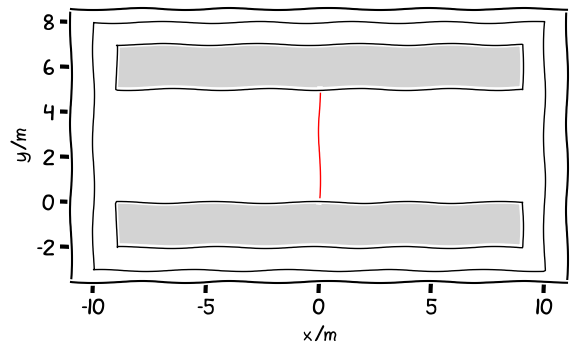

In [10]:
from shapely import LineString
from pedpy import plot_measurement_setup

measurement_line = LineString([(0, 0), (0, 5)])
with plt.xkcd(randomness=0.5):
    plot_measurement_setup(
        geometry=geometry,
        hole_color="lightgrey",
        measurement_lines=[measurement_line],
        ml_color="r",
    ).set_aspect("equal")
    plt.show()

findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfo

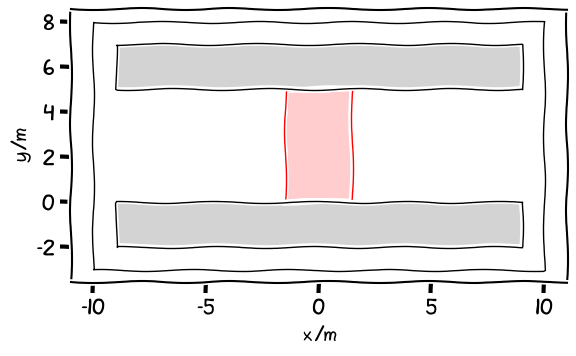

In [11]:
measurement_area = Polygon(
    [(-1.5, 0), (-1.5, 5), (1.5, 5), (1.5, 0), (-1.5, 0)]
)
with plt.xkcd(randomness=0.5):
    plot_measurement_setup(
        geometry=geometry,
        hole_color="lightgrey",
        measurement_areas=[measurement_area],
        ma_color="r",
        ma_alpha=0.1,
        ma_line_color="r",
    ).set_aspect("equal")
    plt.show()

# Setup

In [37]:
output_path = pathlib.Path("images")

In [135]:
peds = [
    ([0.1, 1.3], 3),
    ([2.6, 2.8], 10),
    ([2.1, 0.5], 4),
    ([1.3, 2.1], -5),
    ([0.4, 3.4], -4),
    ([-0.6, 0.4], 1),
    ([-1, 2.9], 3),
    ([-1.5, 1.5], -7),
    ([-2.1, 3], 8),
    ([-2.5, 0.7], -2),
]

## Classic denisty

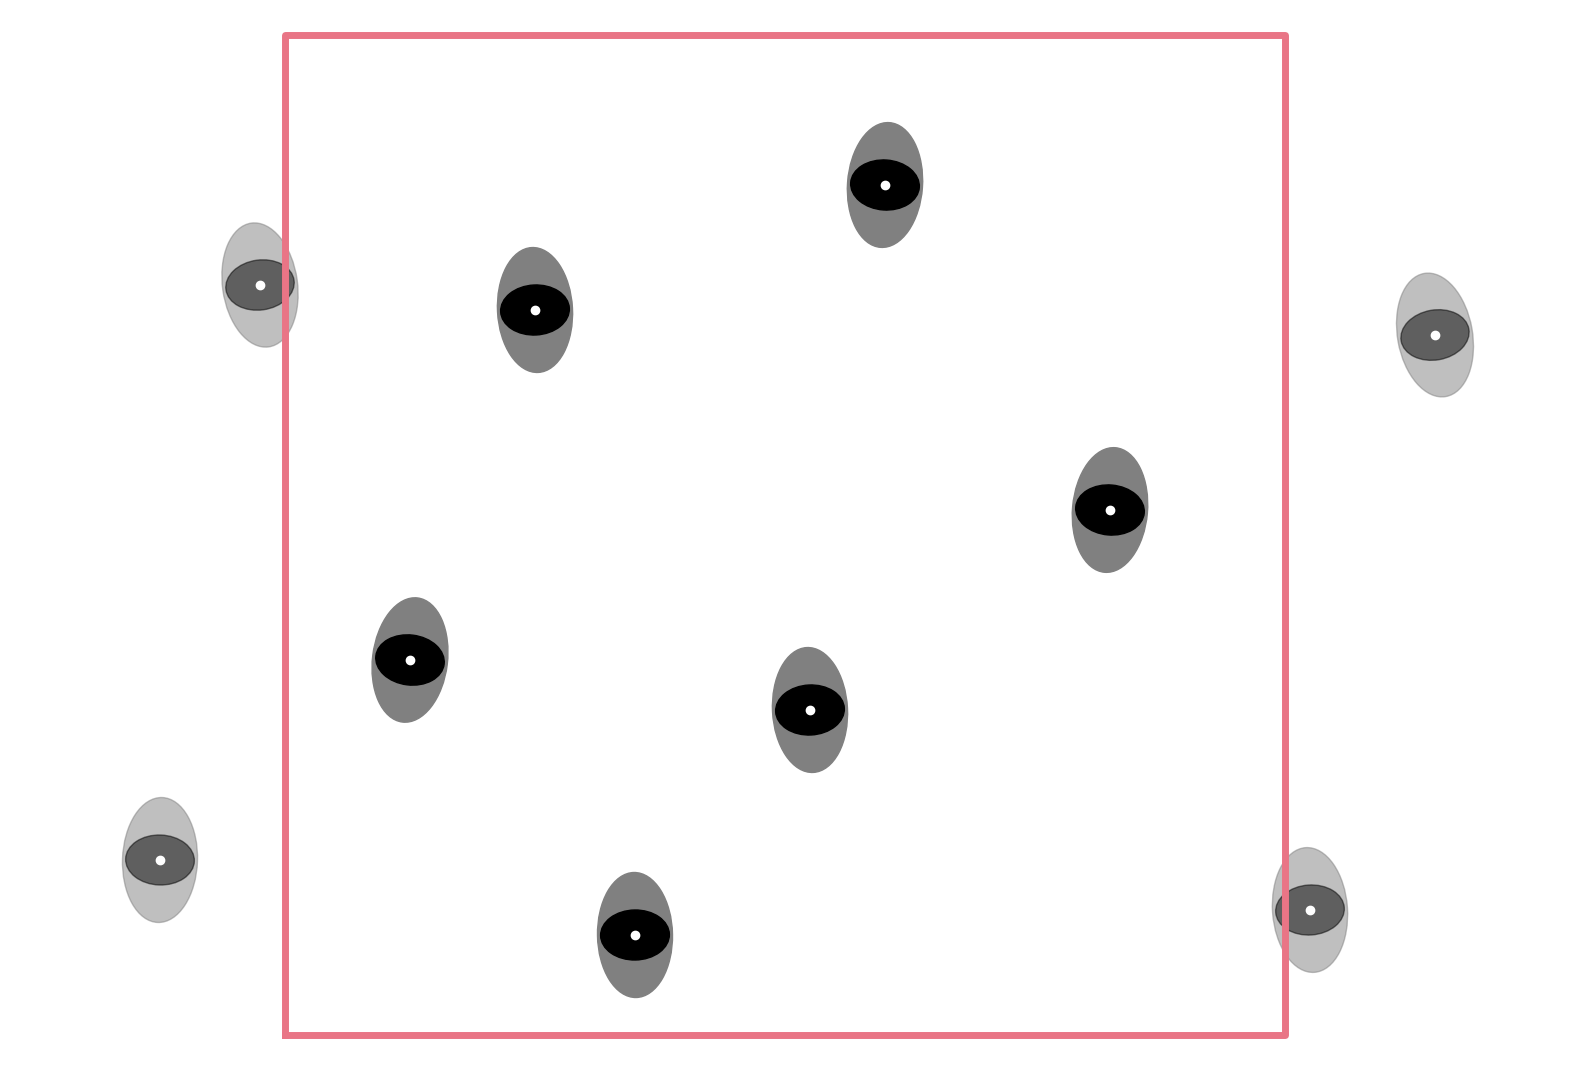

In [148]:
measurement_area = Polygon([(-2, 0), (-2, 4), (2, 4), (2, 0)])
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect("equal")

# ax.fill(*measurement_area.exterior.xy, color="r", alpha=0.05)

ax.plot(*measurement_area.exterior.xy, color=pedpy_red, lw=5)
# ax.fill(
#     *measurement_area.exterior.xy,
#     color=pedpy_blue,
#     alpha=0.1,
# )

for ped in peds:
    alpha = 1 if measurement_area.contains(Point(ped[0])) else 0.5
    plot_ped(ax, ped[0], ped[1], alpha)


ax.set_xlim([-3.1, 3.1])
ax.set_ylim([-0.1, 4.1])
plt.axis("off")
plt.savefig(output_path / "classic_density.png", bbox_inches="tight")
plt.show()

## Voronoi

In [145]:
def compute_voronoi(peds):
    points = MultiPoint([Point(ped[0]) for ped in peds])
    regions = voronoi_diagram(points)

    ped_region = {}
    for region in regions.geoms:
        for ped in peds:
            if Point(ped[0]).within(region):
                ped_region[region] = ped[0]
                continue
    return ped_region

### Without cut-off

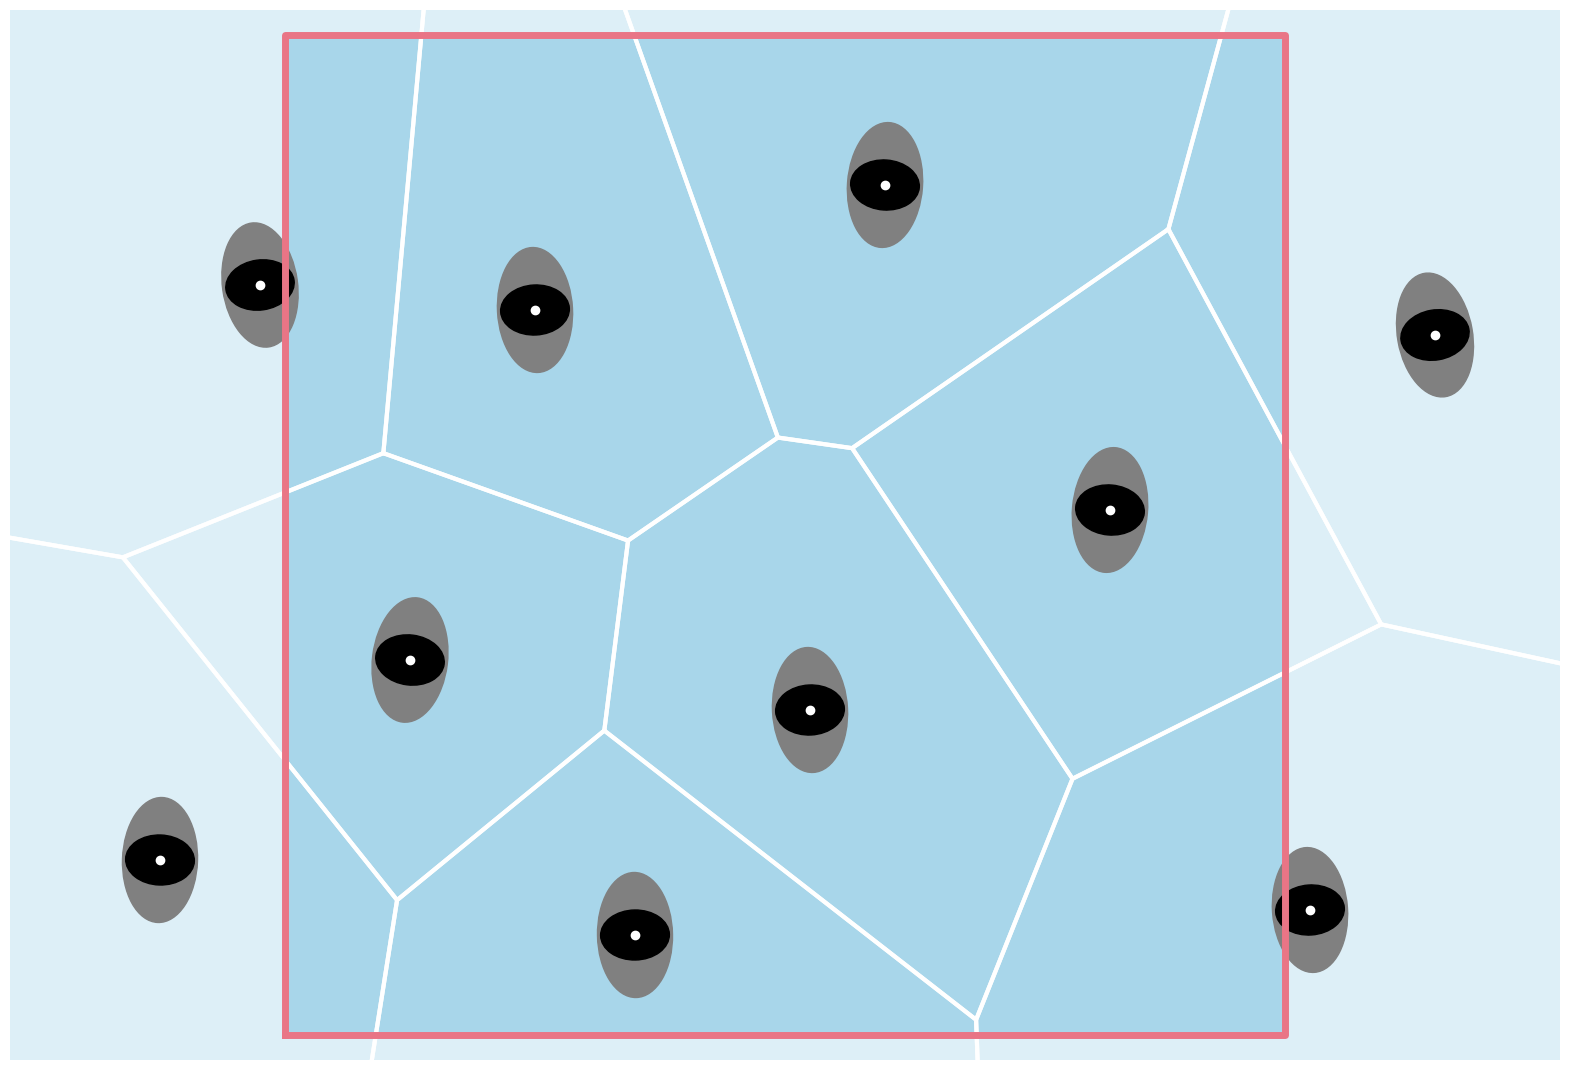

In [156]:
measurement_area = Polygon([(-2, 0), (-2, 4), (2, 4), (2, 0)])
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect("equal")

for region, ped in compute_voronoi(peds).items():
    ax.plot(*region.exterior.xy, color="w", lw=3)
    ax.fill(*region.exterior.xy, color=pedpy_blue, alpha=0.2)
    ax.fill(
        *region.intersection(measurement_area).exterior.xy,
        color=pedpy_blue,
        alpha=0.4,
    )

for ped in peds:
    # alpha = 1 if measurement_area.contains(Point(ped[0])) else 0.2
    alpha = 1
    plot_ped(ax, ped[0], ped[1], alpha)

ax.plot(*measurement_area.exterior.xy, color=pedpy_red, lw=5)

ax.set_xlim([-3.1, 3.1])
ax.set_ylim([-0.1, 4.1])
plt.axis("off")
plt.savefig(output_path / "voronoi_density.png", bbox_inches="tight")
plt.show()

### With cut-off

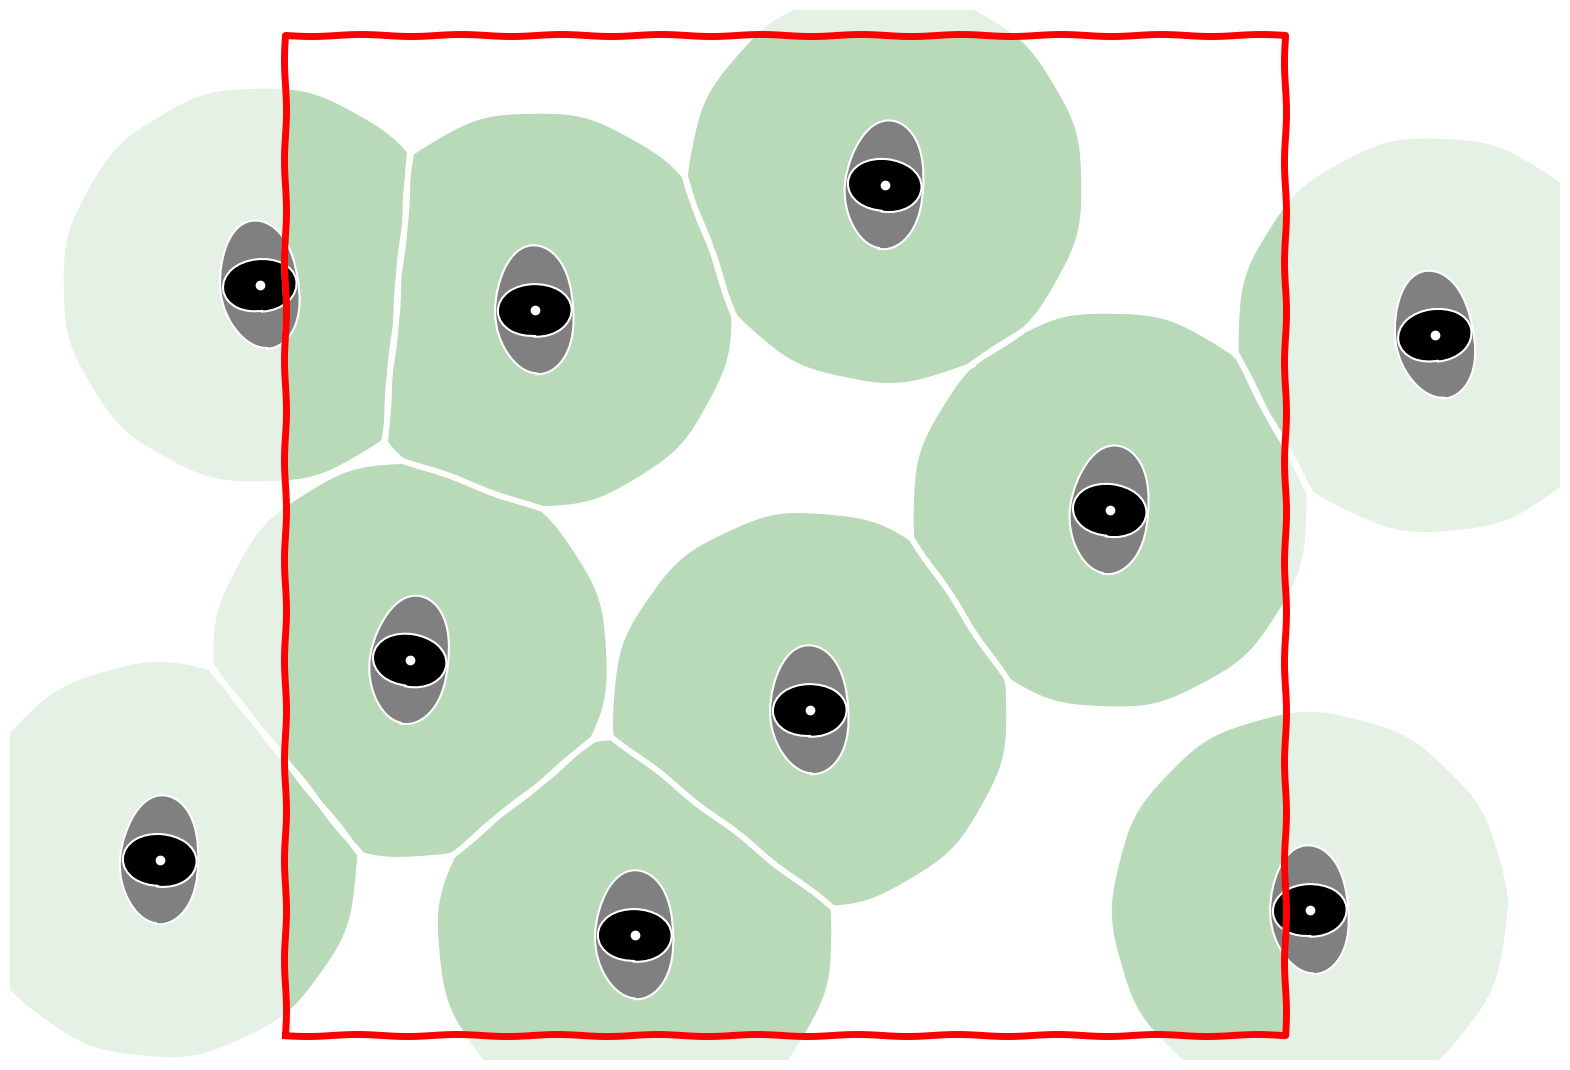

In [17]:
with plt.xkcd(randomness=1):
    measurement_area = Polygon([(-2, 0), (-2, 4), (2, 4), (2, 0)])
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_aspect("equal")

    # ax.fill(*measurement_area.exterior.xy, color="r", alpha=0.1)

    for region, ped in compute_voronoi(peds).items():
        cut_off_region = region.intersection(
            Point(ped).buffer(0.8, quadsegs=100)
        )
        ax.plot(*cut_off_region.exterior.xy, color="w", lw=3)
        ax.fill(*cut_off_region.exterior.xy, color="g", alpha=0.05)
        ax.fill(
            *cut_off_region.intersection(measurement_area).exterior.xy,
            color="g",
            alpha=0.1,
        )

    for ped in peds:
        # alpha = 1 if measurement_area.contains(Point(ped[0])) else 0.2
        alpha = 1
        plot_ped(ax, ped[0], ped[1], alpha)
    ax.plot(*measurement_area.exterior.xy, color="r", lw=5)

    ax.set_xlim([-3.1, 3.1])
    ax.set_ylim([-0.1, 4.1])
    plt.axis("off")
    # plt.savefig(output_path / "voronoi_cutoff_density.png", bbox_inches="tight")
    plt.show()

### Difference n edges

In [18]:
n_peds = 8

peds = [([3 * i, 0], 0) for i in range(n_peds)]

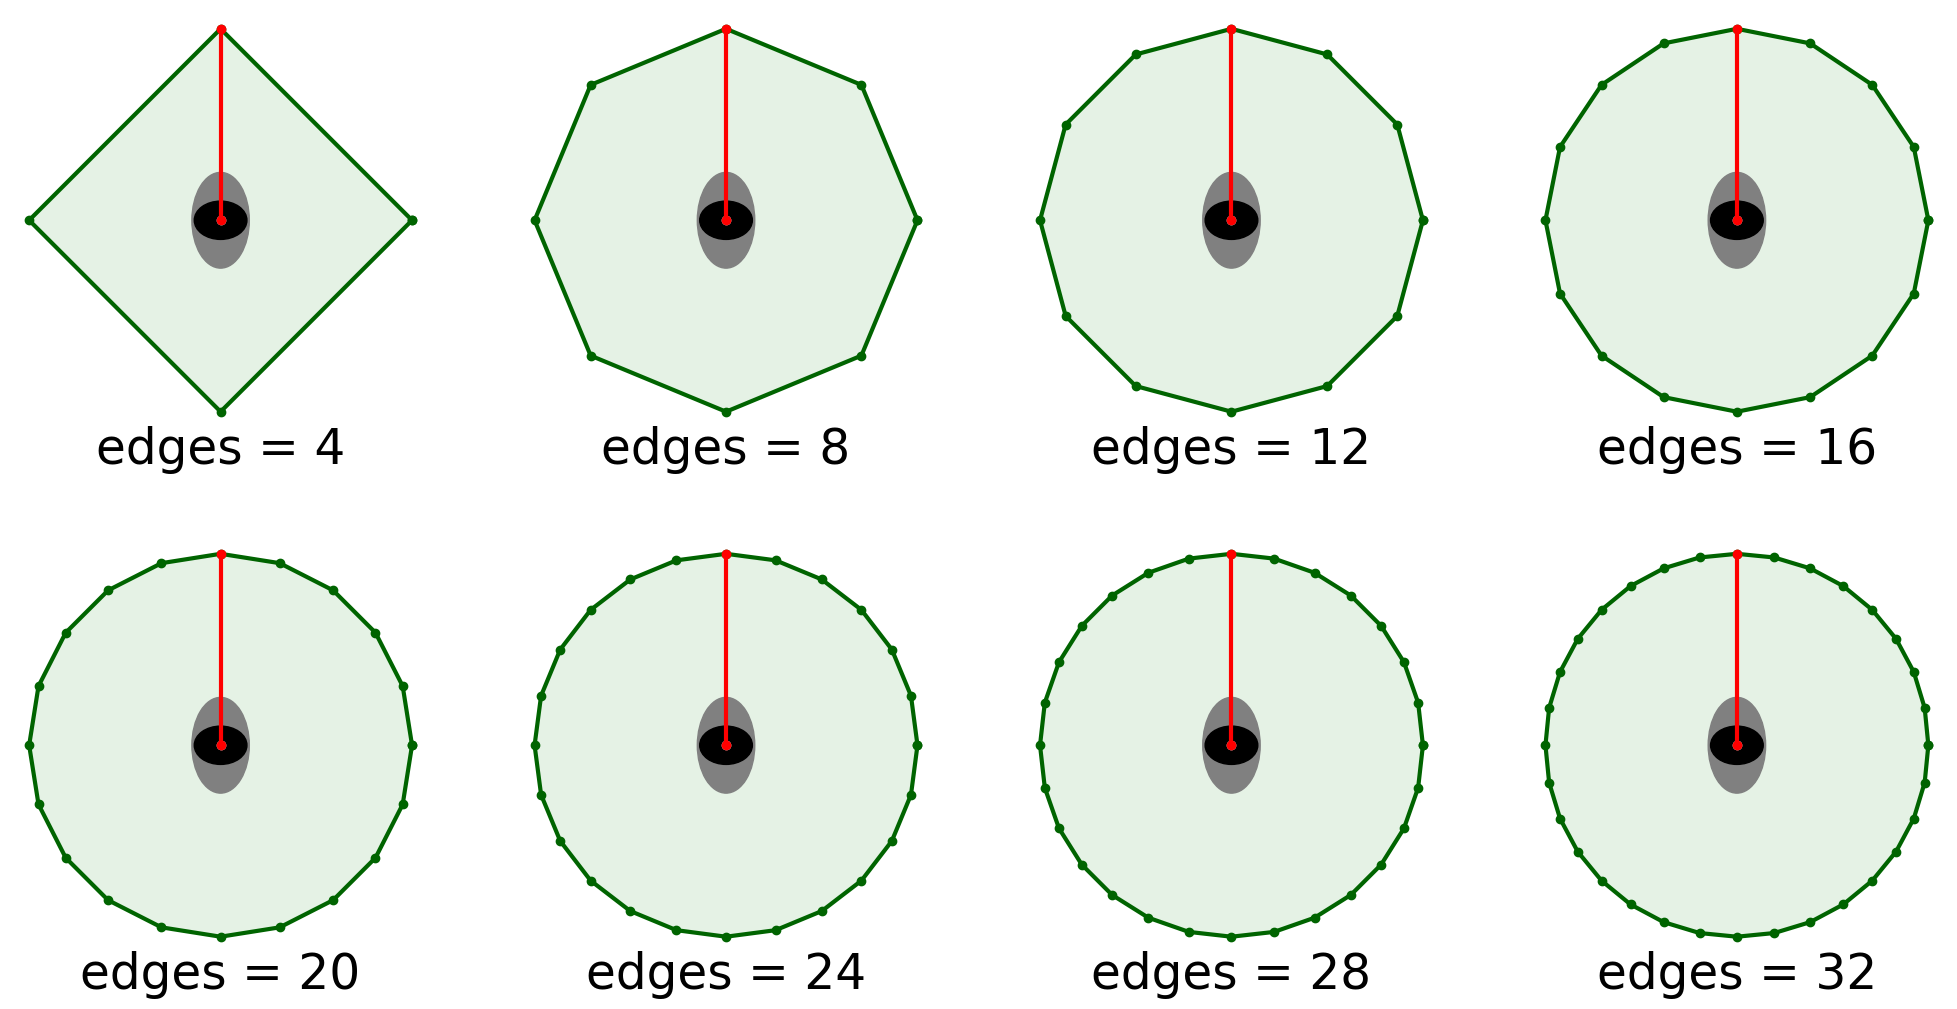

In [43]:
n_peds = 8
fig, axes = plt.subplots(nrows=2, ncols=int(n_peds / 2), figsize=(25, 12.5))

factor = 1
for ax in axes.ravel():
    cut_off_region = Point([0, 0]).buffer(1, quadsegs=factor)
    ax.plot(
        *cut_off_region.exterior.xy,
        color="darkgreen",
        lw=3,
        marker="o",
        markerfacecolor="darkgreen",
    )
    ax.plot([0, 0], [0, 1], color="red", lw=3, marker="o")
    ax.fill(*cut_off_region.exterior.xy, color="g", alpha=0.1)

    # ax.annotate()
    ax.text(  #
        # 0, -1.25, f"edges = {4*factor}\narea = $r * {cut_off_region.area:0.3f}\,m^2$",
        0,
        -1.2,
        f"edges = {4*factor}",
        size=35,
        va="center",
        ha="center",
    )
    # ax.annotate("radius",
    #     xy=(0.05, 0.5), xycoords='data',
    #     xytext=(1.3, 0.7), textcoords='data',
    #     size=30, va="center", ha="center",
    #     arrowprops=dict(arrowstyle="simple",
    #                     connectionstyle="arc3,rad=0.2"),
    #     )

    factor += 1
    plot_ped(ax, [0, 0], 0, 1)
    ax.set_aspect("equal")
    ax.axis("off")
# plt.savefig(output_path / "voronoi_cutoff_differences.png", bbox_inches="tight")
plt.show()

## Velocity

### Both sides

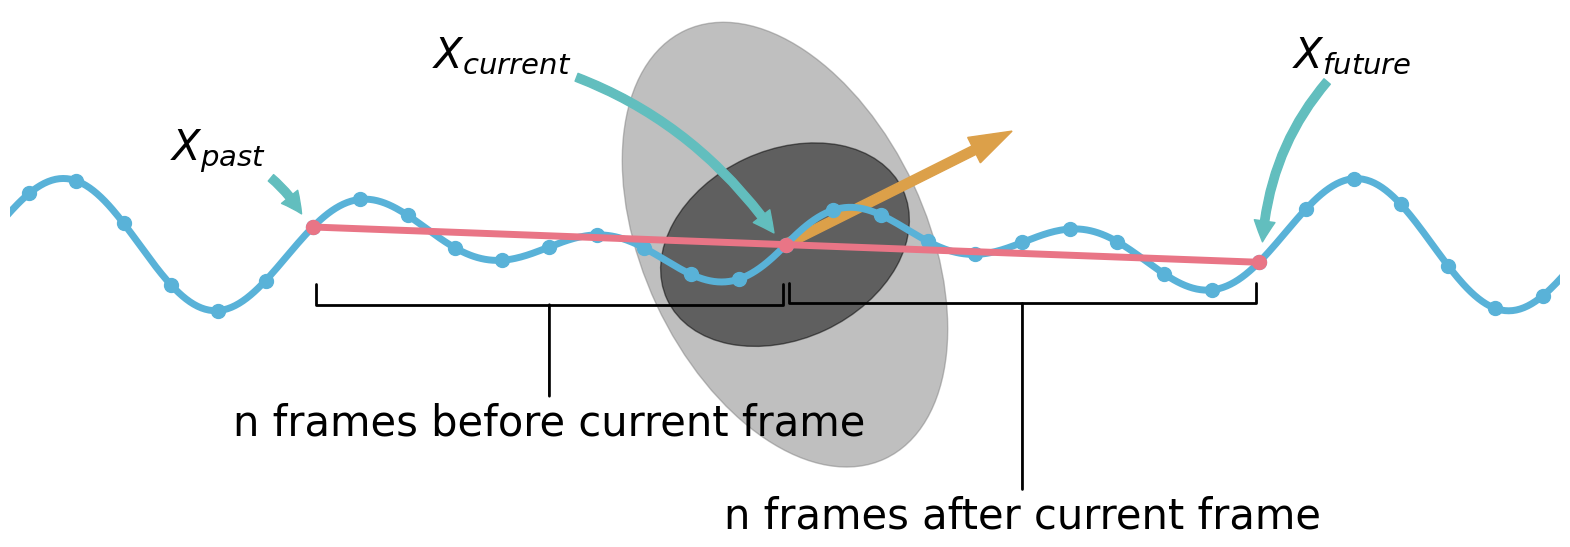

In [52]:
alpha = 0.5
np.random.seed(2)
x = np.linspace(-1, 1, 1000)

y = np.convolve(
    randint(0, 100) * np.sin(randint(0, 100) * x),
    randint(0, 100) * np.cos(randint(0, 100) * x),
    "same",
)
y = (
    MinMaxScaler(feature_range=(-0.07, 0.07))
    .fit_transform(y.reshape(-1, 1))
    .reshape(-1)
)

fig, ax = plt.subplots(figsize=(20, 20))
plot_ped(ax, [0, 0], 25, alpha)

ax.arrow(0, 0, 0.2, 0.1, width=0.01, alpha=1, color=pedpy_orange)


ax.plot(
    x, y, c=pedpy_blue, marker="o", markevery=25, alpha=1, lw=5, markersize=10
)
index_left = int(len(x) / 2 - len(x) / 4)
index_right = int(len(x) / 2 + len(x) / 4)
ax.plot(
    [x[index_right], x[int(len(x) / 2)], x[index_left]],
    [y[index_right], y[int(len(x) / 2)], y[index_left]],
    c=pedpy_red,
    marker="o",
    lw=5,
    markersize=10,
)
ax.annotate(
    "n frames before current frame",
    fontsize=30,
    xy=(
        x[index_left] + 0.5 * (x[int(len(x) / 2)] - x[index_left]),
        y[index_left] + 0.5 * (y[int(len(x) / 2)] - y[index_left]) - 0.07,
    ),
    arrowprops=dict(arrowstyle="-[, widthB=5.6, lengthB=0.5", lw=2.0),
    ha="center",
    va="bottom",
    xytext=(
        x[index_left] + 0.5 * (x[int(len(x) / 2)] - x[index_left]),
        y[index_left] + 0.5 * (y[int(len(x) / 2)] - y[index_left]) - 0.22,
    ),
)

ax.annotate(
    "n frames after current frame",
    fontsize=30,
    xy=(
        x[index_right] + 0.5 * (x[int(len(x) / 2)] - x[index_right]),
        y[index_right] + 0.5 * (y[int(len(x) / 2)] - y[index_right]) - 0.05,
    ),
    arrowprops=dict(arrowstyle="-[, widthB=5.6, lengthB=0.5", lw=2.0),
    ha="center",
    va="bottom",
    xytext=(
        x[index_right] + 0.5 * (x[int(len(x) / 2)] - x[index_right]),
        y[index_right] + 0.5 * (y[int(len(x) / 2)] - y[index_right]) - 0.3,
    ),
)

ax.annotate(
    "$X_{past}$",
    xy=(-0.51, 0.03),
    xycoords="data",
    xytext=(-0.6, 0.1),
    textcoords="data",
    size=30,
    va="center",
    ha="center",
    arrowprops=dict(
        arrowstyle="simple", connectionstyle="arc3,rad=-0.2", color=pedpy_petrol
    ),
)

ax.annotate(
    "$X_{current}$",
    xy=(-0.01, 0.01),
    xycoords="data",
    xytext=(-0.3, 0.2),
    textcoords="data",
    size=30,
    va="center",
    ha="center",
    arrowprops=dict(
        arrowstyle="simple", connectionstyle="arc3,rad=-0.2", color=pedpy_petrol
    ),
)

ax.annotate(
    "$X_{future}$",
    xy=(0.505, -0.0),
    xycoords="data",
    xytext=(0.6, 0.2),
    textcoords="data",
    size=30,
    va="center",
    ha="center",
    arrowprops=dict(
        arrowstyle="simple", connectionstyle="arc3,rad=0.2", color=pedpy_petrol
    ),
)

ax.set_xlim([-0.82, 0.82])
ax.set_aspect("equal")
# alpha = 0.5
plt.axis("off")
plt.savefig(output_path / "speed_both.png", bbox_inches="tight", pad_inches=0)
# plt.show()

### past

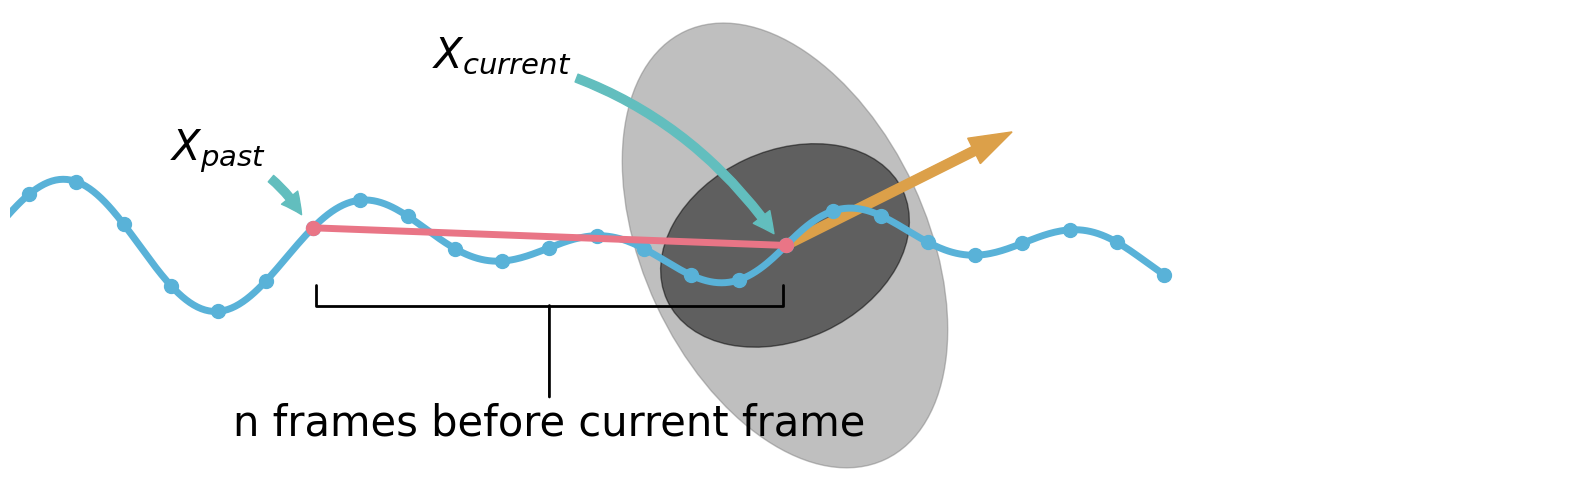

In [48]:
np.random.seed(2)
x = np.linspace(-1, 1, 1000)

# y = randint(0, 100)*np.sin(randint(0,100)*x)+randint(0,100)*np.cos(randint(0,100)*x)
y = np.convolve(
    randint(0, 100) * np.sin(randint(0, 100) * x),
    randint(0, 100) * np.cos(randint(0, 100) * x),
    "same",
)
y = (
    MinMaxScaler(feature_range=(-0.07, 0.07))
    .fit_transform(y.reshape(-1, 1))
    .reshape(-1)
)

fig, ax = plt.subplots(figsize=(20, 20))
plot_ped(ax, [0, 0], 25, alpha)

ax.plot(
    x[:701],
    y[:701],
    c=pedpy_blue,
    marker="o",
    markevery=25,
    alpha=1,
    lw=5,
    markersize=10,
)
index_left = int(len(x) / 2 - len(x) / 4)
index_right = int(len(x) / 2 + len(x) / 4)
ax.plot(
    [x[int(len(x) / 2)], x[index_left]],
    [y[int(len(x) / 2)], y[index_left]],
    c=pedpy_red,
    marker="o",
    lw=5,
    markersize=10,
)
ax.arrow(0, 0, 0.2, 0.1, width=0.01, alpha=1, color=pedpy_orange)
ax.annotate(
    "n frames before current frame",
    fontsize=30,
    xy=(
        x[index_left] + 0.5 * (x[int(len(x) / 2)] - x[index_left]),
        y[index_left] + 0.5 * (y[int(len(x) / 2)] - y[index_left]) - 0.07,
    ),
    arrowprops=dict(arrowstyle="-[, widthB=5.6, lengthB=0.5", lw=2.0),
    ha="center",
    va="bottom",
    xytext=(
        x[index_left] + 0.5 * (x[int(len(x) / 2)] - x[index_left]),
        y[index_left] + 0.5 * (y[int(len(x) / 2)] - y[index_left]) - 0.22,
    ),
)
ax.annotate(
    "$X_{past}$",
    xy=(-0.51, 0.03),
    xycoords="data",
    xytext=(-0.6, 0.1),
    textcoords="data",
    size=30,
    va="center",
    ha="center",
    arrowprops=dict(
        arrowstyle="simple", connectionstyle="arc3,rad=-0.2", color=pedpy_petrol
    ),
)

ax.annotate(
    "$X_{current}$",
    xy=(-0.01, 0.01),
    xycoords="data",
    xytext=(-0.3, 0.2),
    textcoords="data",
    size=30,
    va="center",
    ha="center",
    arrowprops=dict(
        arrowstyle="simple", connectionstyle="arc3,rad=-0.2", color=pedpy_petrol
    ),
)

ax.set_xlim([-0.82, 0.82])
ax.set_aspect("equal")
alpha = 0.5
plt.axis("off")
plt.savefig(output_path / "speed_past.png", bbox_inches="tight", pad_inches=0)
plt.show()

### future

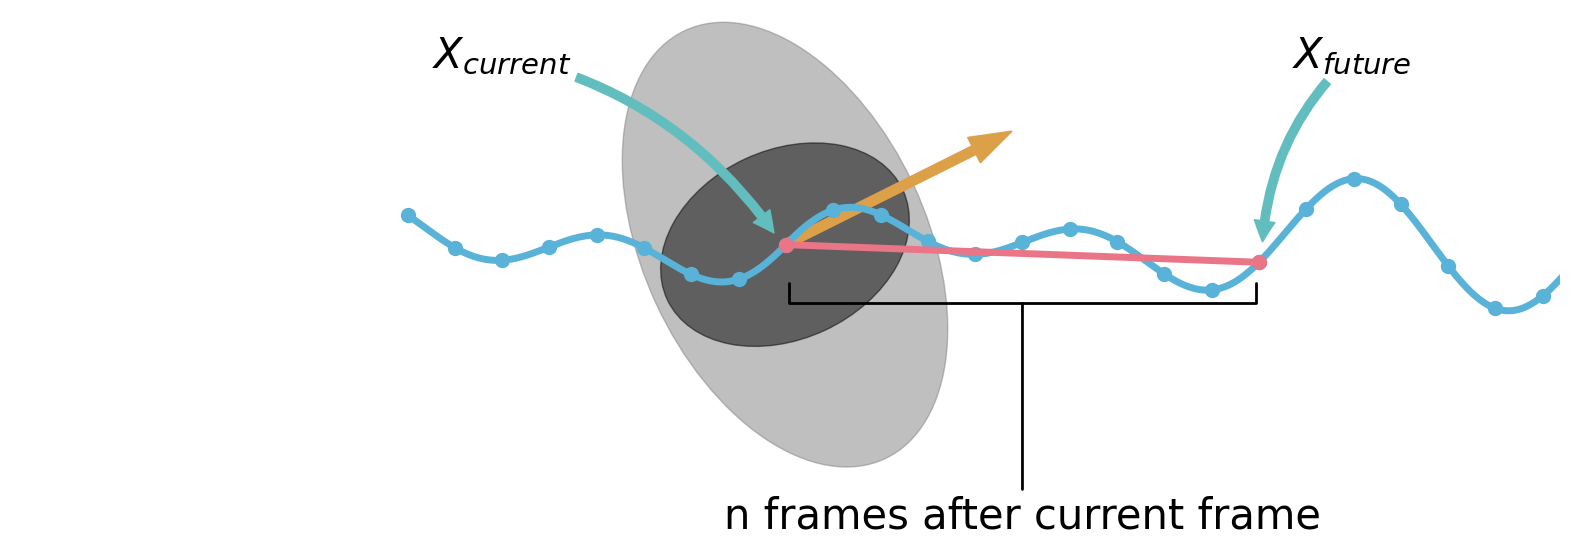

In [51]:
np.random.seed(2)
x = np.linspace(-1, 1, 1000)

y = np.convolve(
    randint(0, 100) * np.sin(randint(0, 100) * x),
    randint(0, 100) * np.cos(randint(0, 100) * x),
    "same",
)
y = (
    MinMaxScaler(feature_range=(-0.07, 0.07))
    .fit_transform(y.reshape(-1, 1))
    .reshape(-1)
)

fig, ax = plt.subplots(figsize=(20, 20))
plot_ped(ax, [0, 0], 25, alpha)

ax.plot(
    x[300:],
    y[300:],
    c=pedpy_blue,
    marker="o",
    markevery=25,
    alpha=1,
    lw=5,
    markersize=10,
)
index_left = int(len(x) / 2 - len(x) / 4)
index_right = int(len(x) / 2 + len(x) / 4)
ax.plot(
    [x[index_right], x[int(len(x) / 2)]],
    [y[index_right], y[int(len(x) / 2)]],
    c=pedpy_red,
    marker="o",
    lw=5,
    markersize=10,
)
ax.arrow(0, 0, 0.2, 0.1, width=0.01, alpha=1, color=pedpy_orange)

ax.annotate(
    "n frames after current frame",
    fontsize=30,
    xy=(
        x[index_right] + 0.5 * (x[int(len(x) / 2)] - x[index_right]),
        y[index_right] + 0.5 * (y[int(len(x) / 2)] - y[index_right]) - 0.05,
    ),
    arrowprops=dict(arrowstyle="-[, widthB=5.6, lengthB=0.5", lw=2.0),
    ha="center",
    va="bottom",
    xytext=(
        x[index_right] + 0.5 * (x[int(len(x) / 2)] - x[index_right]),
        y[index_right] + 0.5 * (y[int(len(x) / 2)] - y[index_right]) - 0.3,
    ),
)

ax.annotate(
    "$X_{current}$",
    xy=(-0.01, 0.01),
    xycoords="data",
    xytext=(-0.3, 0.2),
    textcoords="data",
    size=30,
    va="center",
    ha="center",
    arrowprops=dict(
        arrowstyle="simple", connectionstyle="arc3,rad=-0.2", color=pedpy_petrol
    ),
)

ax.annotate(
    "$X_{future}$",
    xy=(0.505, -0.0),
    xycoords="data",
    xytext=(0.6, 0.2),
    textcoords="data",
    size=30,
    va="center",
    ha="center",
    arrowprops=dict(
        arrowstyle="simple", connectionstyle="arc3,rad=0.2", color=pedpy_petrol
    ),
)


ax.set_xlim([-0.82, 0.82])
ax.set_aspect("equal")
alpha = 0.5
plt.axis("off")
plt.savefig(output_path / "speed_future.png", bbox_inches="tight", pad_inches=0)
plt.show()

### Movement direction

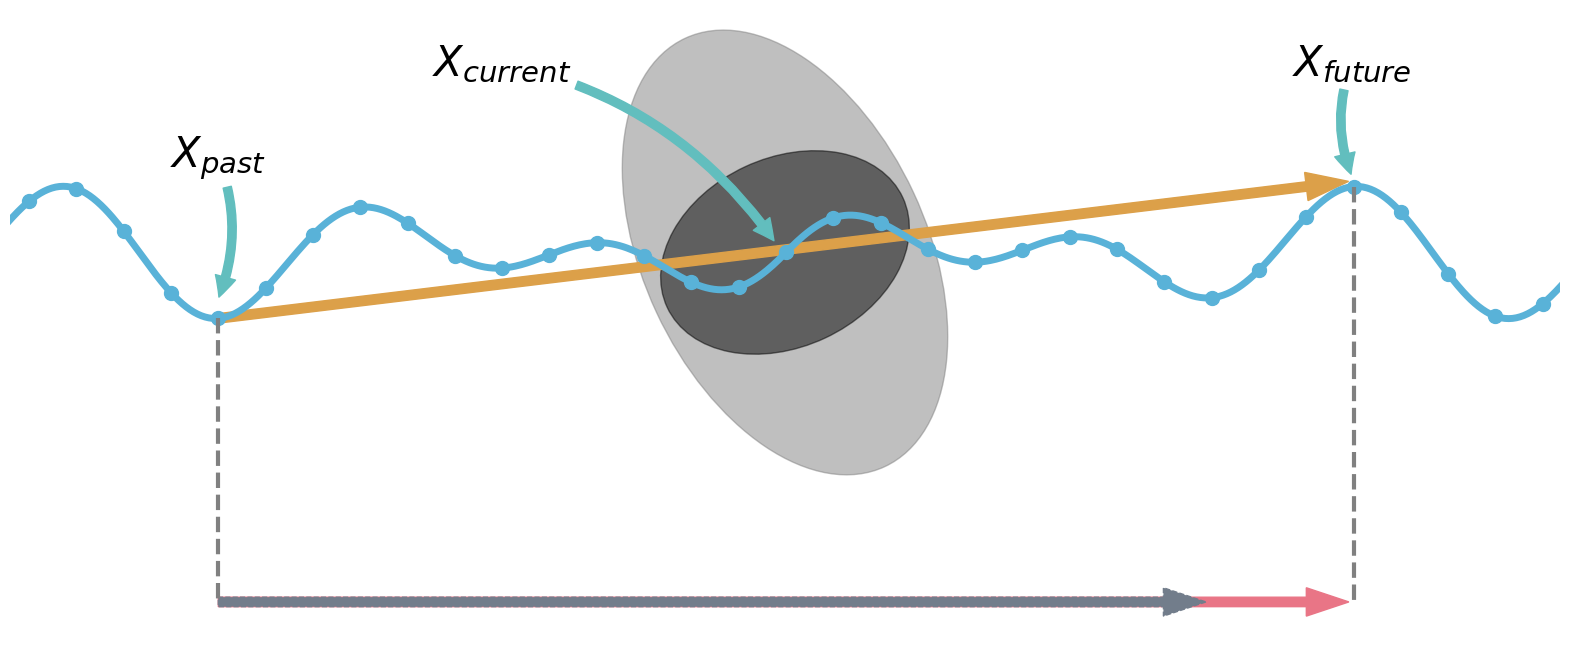

In [133]:
alpha = 0.5
np.random.seed(2)
x = np.linspace(-1, 1, 1000)

y = np.convolve(
    randint(0, 100) * np.sin(randint(0, 100) * x),
    randint(0, 100) * np.cos(randint(0, 100) * x),
    "same",
)
y = (
    MinMaxScaler(feature_range=(-0.07, 0.07))
    .fit_transform(y.reshape(-1, 1))
    .reshape(-1)
)

fig, ax = plt.subplots(figsize=(20, 20))
plot_ped(ax, [0, 0], 25, alpha)

ax.plot(
    x, y, c=pedpy_blue, marker="o", markevery=25, alpha=1, lw=5, markersize=10
)
index_left = int(len(x) / 2 - len(x) / 4) - 50
index_right = int(len(x) / 2 + len(x) / 4) + 50

ax.annotate(
    "$X_{past}$",
    xy=(-0.6, -0.05),
    xycoords="data",
    xytext=(-0.6, 0.1),
    textcoords="data",
    size=30,
    va="center",
    ha="center",
    arrowprops=dict(
        arrowstyle="simple", connectionstyle="arc3,rad=-0.2", color=pedpy_petrol
    ),
)

ax.annotate(
    "$X_{current}$",
    xy=(-0.01, 0.01),
    xycoords="data",
    xytext=(-0.3, 0.2),
    textcoords="data",
    size=30,
    va="center",
    ha="center",
    arrowprops=dict(
        arrowstyle="simple", connectionstyle="arc3,rad=-0.2", color=pedpy_petrol
    ),
)

ax.annotate(
    "$X_{future}$",
    xy=(0.60, 0.08),
    xycoords="data",
    xytext=(0.6, 0.2),
    textcoords="data",
    size=30,
    va="center",
    ha="center",
    arrowprops=dict(
        arrowstyle="simple", connectionstyle="arc3,rad=0.2", color=pedpy_petrol
    ),
)


ax.arrow(
    x[index_left],
    y[index_left],
    np.abs(x[index_right] - x[index_left] - 0.05),
    y[index_right] - y[index_left] - 0.0,
    width=0.01,
    alpha=1,
    color=pedpy_orange,
)

ax.arrow(
    x[index_left],
    y[index_left] - 0.3,
    x[index_right] - x[index_left] - 0.05,
    0,
    width=0.01,
    alpha=1,
    color=pedpy_red,
)

ax.arrow(
    x[index_left],
    y[index_left] - 0.3,
    1,
    0,
    width=0.01,
    alpha=1,
    color=pedpy_grey,
    linestyle="--",
)

ax.plot(
    [x[index_left], x[index_left]],
    [y[index_left], y[index_left] - 0.3],
    lw=3,
    linestyle="--",
    color="grey",
)
ax.plot(
    [x[index_right], x[index_right]],
    [y[index_right], y[index_left] - 0.3],
    lw=3,
    linestyle="--",
    color="grey",
)

ax.set_xlim([-0.82, 0.82])
ax.set_aspect("equal")
# alpha = 0.5
plt.axis("off")
plt.savefig(
    output_path / "speed_movement_direction.png",
    bbox_inches="tight",
    pad_inches=0,
)
plt.show()

# Profiles

In [35]:
from shapely import Polygon
from pedpy import WalkableArea

obstacles = [
    [(-9, -2), (-9, 0), (9, 0), (9, -2), (-9, -2)],
    [(-9, 5), (-9, 7), (9, 7), (9, 5), (-9, 5)],
]
walkable_area = WalkableArea(
    Polygon([(-10, -3), (-10, 8), (10, 8), (10, -3)], obstacles)
)

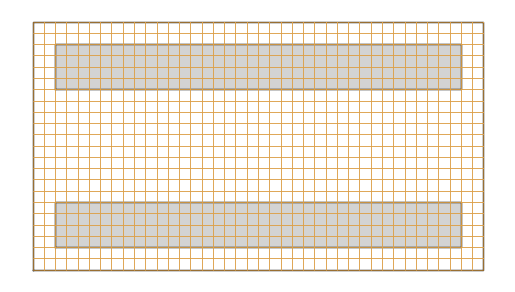

In [45]:
from pedpy import plot_measurement_setup, MeasurementArea
from pedpy.methods.profile_calculator import _get_grid_cells

cells = _get_grid_cells(walkable_area=walkable_area, grid_size=0.5)

grid_cells = [MeasurementArea(cell) for cell in cells[0]]
plot_measurement_setup(
    walkable_area=walkable_area,
    hole_color="lightgrey",
    measurement_areas=grid_cells,
    ma_line_color=pedpy_orange,
    ma_line_width=0.5,
    ma_alpha=0,
).set_aspect("equal")
plt.savefig(output_path / "profile_grid.png", bbox_inches="tight")
plt.axis("off")

plt.show()

# Method utils

## Frame range in area

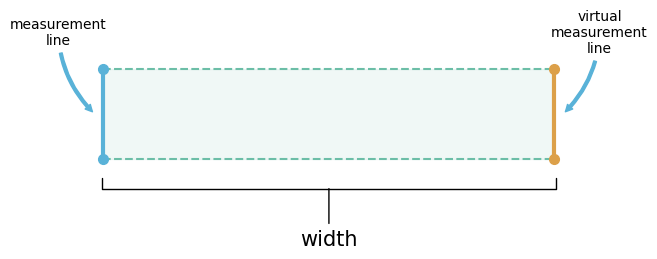

In [186]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.fill([0, 0, 5, 5], [0, 1, 1, 0], c=pedpy_green, alpha=0.1)
plt.plot([0, 5], [0, 0], c=pedpy_green, linestyle="--")
plt.plot([0, 5], [1, 1], c=pedpy_green, linestyle="--")

plt.plot([0, 0], [0, 1], c=pedpy_blue, lw=3, marker="o", markersize=7)
plt.plot([5, 5], [0, 1], c=pedpy_orange, lw=3, marker="o", markersize=7)

ax.annotate(
    "width",
    xy=(
        2.5,
        -0.3,
    ),
    size=15,
    arrowprops=dict(arrowstyle="-[, widthB=10.9, lengthB=0.5", lw=1.0),
    ha="center",
    va="bottom",
    xytext=(
        2.5,
        -1,
    ),
)

ax.annotate(
    "measurement\nline",
    xy=(-0.1, 0.5),
    xycoords="data",
    xytext=(-0.5, 1.4),
    textcoords="data",
    size=10,
    va="center",
    ha="center",
    arrowprops=dict(
        arrowstyle="simple", connectionstyle="arc3,rad=0.2", color=pedpy_blue
    ),
)

ax.annotate(
    "virtual\nmeasurement\nline",
    xy=(5.1, 0.5),
    xycoords="data",
    xytext=(5.5, 1.4),
    textcoords="data",
    size=10,
    va="center",
    ha="center",
    arrowprops=dict(
        arrowstyle="simple", connectionstyle="arc3,rad=-0.2", color=pedpy_blue
    ),
)

ax.set_aspect("equal")
plt.ylim([-1, 1.2])
plt.axis("off")

plt.savefig(output_path / "passing_area_from_lines.png", bbox_inches="tight")

plt.show()

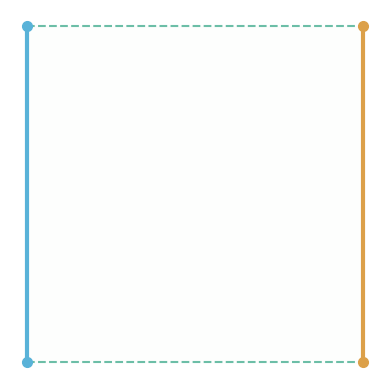

In [314]:
from scipy.interpolate import splrep, BSpline
import numpy.random as rng
from scipy import interpolate, signal

fig, ax = plt.subplots()

plt.fill([0, 0, 5, 5], [0, 5, 5, 0], c=pedpy_green, alpha=0.01)
plt.plot([0, 5], [0, 0], c=pedpy_green, linestyle="--")
plt.plot([0, 5], [5, 5], c=pedpy_green, linestyle="--")

plt.plot([0, 0], [0, 5], c=pedpy_blue, lw=3, marker="o", markersize=7)
plt.plot([5, 5], [0, 5], c=pedpy_orange, lw=3, marker="o", markersize=7)

# Valid one go
x_points = np.arange(start=-0.5, stop=5.6, step=0.1)

noise = 0.1 * rng.standard_normal(size=len(x_points))
y_points = 4.5 * np.ones_like(x_points)
y_points += noise

tck = splrep(x_points, y_points, s=0.15)

y = BSpline(*tck)(x_points)
# plt.plot(x_points, y, c=pedpy_grey)
# plt.plot(x_points[(x_points >= 0) & (x_points <=5)], y[(x_points >= 0) & (x_points <=5)],c=pedpy_red)


# x_points = np.append(
#     np.arange(start=-0.5, stop=0.5, step=0.1),
#     [np.arange(start=0.5, stop=-0.2, step=0.1),
#     np.arange(start=-0.2, stop=5.6, step=0.1)]
# )
# noise = 0.1*rng.standard_normal(size=len(x_points))
# y_points = 4.5 * np.ones_like(x_points)
# y_points += noise
#
# plt.plot(x_points, y_points, c=pedpy_grey)

plt.axis("off")
ax.set_aspect("equal")
plt.savefig(output_path / "crossing_frames.svg", bbox_inches="tight")

plt.show()

In [307]:
x_points

array([-5.00000000e-01, -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
       -1.00000000e-01, -1.11022302e-16,  1.00000000e-01,  2.00000000e-01,
        3.00000000e-01,  4.00000000e-01])

# Getting started guide

In [72]:
from shapely import LineString

left_obstacle = LineString(
    [[-0.25, -1], [-0.25, 0], [-2.8, 0], [-2.8, 7]]
).buffer(0.2, single_sided=True, cap_style="flat", join_style="mitre")
right_obstacle = LineString([[0.25, -1], [0.25, 0], [2.8, 0], [2.8, 7]]).buffer(
    -0.2, single_sided=True, cap_style="flat", join_style="mitre"
)

In [89]:
list(right_obstacle.exterior.coords)

[(0.25, -1.0),
 (0.25, 0.0),
 (2.8, 0.0),
 (2.8, 7.0),
 (3.0, 7.0),
 (3.0, -0.2),
 (0.45, -0.2),
 (0.45, -1.0),
 (0.25, -1.0)]

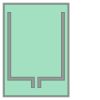

In [73]:
from pedpy import WalkableArea

walkable_area = WalkableArea(
    [
        (3.5, -2),
        (3.5, 8),
        (-3.5, 8),
        (-3.5, -2),
    ],
    [
        tuple(left_obstacle.exterior.coords),
        tuple(right_obstacle.exterior.coords),
    ],
)
walkable_area.polygon

In [86]:
walkable_area.polygon.wkt

'POLYGON ((3.5 -2, 3.5 8, -3.5 8, -3.5 -2, 3.5 -2), (-2.8 7, -2.8 0, -0.25 0, -0.25 -1, -0.45 -1, -0.45 -0.2, -3 -0.2, -3 7, -2.8 7), (0.25 -1, 0.25 0, 2.8 0, 2.8 7, 3 7, 3 -0.2, 0.45 -0.2, 0.45 -1, 0.25 -1))'

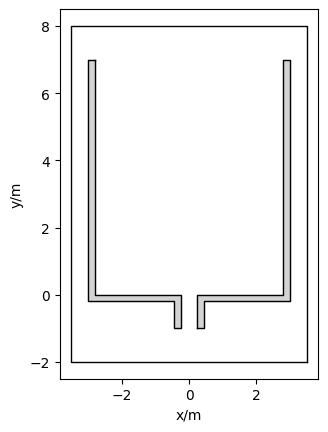

In [96]:
from pedpy import plot_walkable_area

ax = plot_walkable_area(
    walkable_area=walkable_area, hole_color="lightgrey"
).set_aspect("equal")

# ax.set_aspect("equal")
# ax.grid()

In [44]:
from pedpy import MeasurementLine

measurement_line = MeasurementLine([(0.25, 0), (-0.25, 0)])

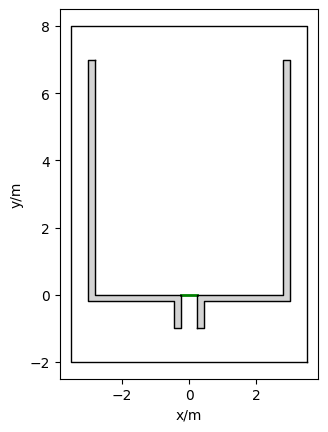

In [84]:
from pedpy.plotting.plotting import plot_measurement_setup

ax = plot_measurement_setup(
    walkable_area=walkable_area,
    measurement_lines=[measurement_line],
    hole_color="lightgrey",
    ml_color="g",
    ml_width=2,
)

ax.set_aspect("equal")

In [48]:
from pedpy import MeasurementArea

measurement_area = MeasurementArea(
    [(-0.4, 0.5), (0.4, 0.5), (0.4, 1.3), (-0.4, 1.3)]
)

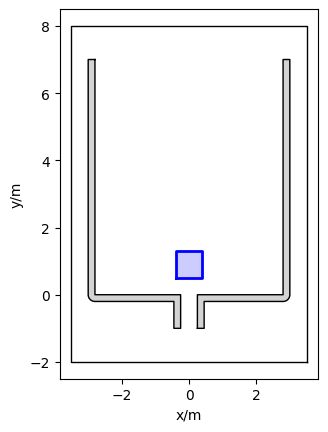

In [52]:
from pedpy.plotting.plotting import plot_measurement_setup

ax = plot_measurement_setup(
    walkable_area=walkable_area,
    measurement_areas=[measurement_area],
    hole_color="lightgrey",
    ma_color="b",
    ma_line_color="b",
    ma_line_width=2,
    ma_alpha=0.2,
)

ax.set_aspect("equal")

In [56]:
from pedpy import load_trajectory
import pathlib

traj = load_trajectory(
    trajectory_file=pathlib.Path("getting_started/040_c_56_h-.txt")
)
traj

TrajectoryData:
        file: getting_started/040_c_56_h-.txt
        frame rate: 25.0
        frames: [(0, 1656)]
        number pedestrians: 75
        bounding box: (-2.6042, -1.8723, 2.2641, 5.98)
        data: 
           ID  frame       X       Y     Z                 points
0   1      0  2.1569  2.6590  1.76   POINT (2.1569 2.659)
1   1      1  2.1498  2.6653  1.76  POINT (2.1498 2.6653)
2   1      2  2.1532  2.6705  1.76  POINT (2.1532 2.6705)
3   1      3  2.1557  2.6496  1.76  POINT (2.1557 2.6496)
4   1      4  2.1583  2.6551  1.76  POINT (2.1583 2.6551)
5   1      5  2.1643  2.6508  1.76  POINT (2.1643 2.6508)
6   1      6  2.1723  2.6477  1.76  POINT (2.1723 2.6477)
7   1      7  2.1845  2.6485  1.76  POINT (2.1845 2.6485)
8   1      8  2.1988  2.6491  1.76  POINT (2.1988 2.6491)
9   1      9  2.2138  2.6540  1.76   POINT (2.2138 2.654)
        

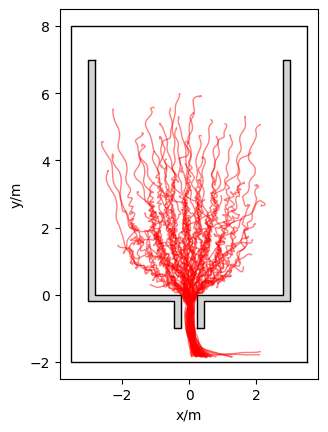

In [79]:
from pedpy.plotting.plotting import plot_trajectories

ax = plot_trajectories(
    traj=traj,
    walkable_area=walkable_area,
    traj_alpha=0.5,
    traj_width=1,
    hole_color="lightgrey",
)

ax.set_aspect("equal")

In [76]:
from pedpy import get_invalid_trajectory

get_invalid_trajectory(traj=traj, walkable_area=walkable_area)

,ID,frame,X,Y,Z,points


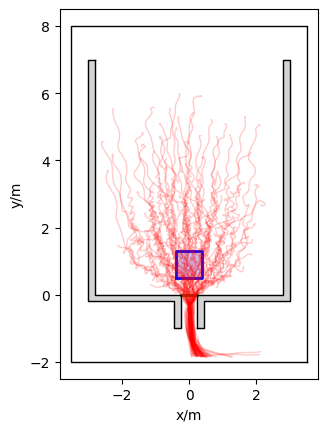

In [83]:
ax = plot_measurement_setup(
    walkable_area=walkable_area,
    hole_color="lightgrey",
    measurement_areas=[measurement_area],
    ma_color="b",
    ma_line_color="b",
    ma_line_width=2,
    ma_alpha=0.2,
    measurement_lines=[measurement_line],
    ml_color="g",
    ml_width=2,
    traj=traj,
    traj_alpha=0.2,
    traj_width=1,
)

ax.set_aspect("equal")

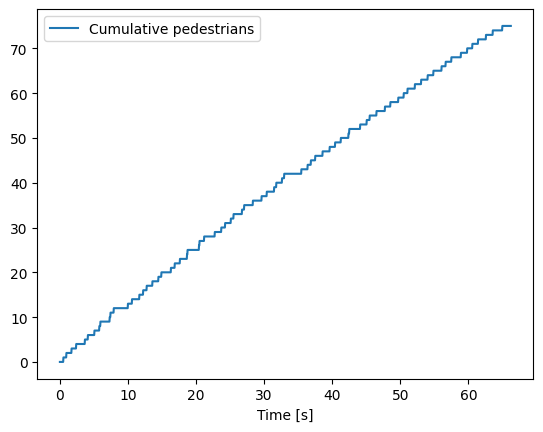

In [94]:
from pedpy import compute_n_t

nt, _ = compute_n_t(
    traj_data=traj.data,
    measurement_line=measurement_line,
    frame_rate=traj.frame_rate,
)
nt.plot(x="Time [s]");